In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing necessary Liberaries

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pywaffle import Waffle
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import sklearn.naive_bayes as nb
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score,recall_score, precision_score,PrecisionRecallDisplay, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest
from boruta import BorutaPy


# Loading Dataset

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/codesoft/t5/creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing

In [5]:
dataset.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##Droping duplicates

In [7]:
dataset.duplicated().sum()

1081

In [8]:
dataset.drop_duplicates(inplace = True)
dataset.duplicated().sum()

0

In [9]:
dataset['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

##Useing Undersampling and OverSampling to handle data imbalance

In [10]:
Over_S = RandomOverSampler(sampling_strategy = 1)
Under_S = RandomUnderSampler()

In [11]:
X= dataset.drop('Class', axis = 1)
y= dataset['Class']
print("number of frauds in data = ", y.value_counts()[1])
print("number of non-frauds in data = ", y.value_counts()[0])

number of frauds in data =  473
number of non-frauds in data =  283253


In [12]:
x_os, y_os = Over_S.fit_resample(X,y)
y_os.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [13]:
x_us, y_us = Under_S.fit_resample(X,y)
y_us.value_counts()

0    473
1    473
Name: Class, dtype: int64

#Modeling

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X.values,y.values,test_size=0.2,random_state=0)
print("Training Set of the inpalanced data =",x_train.shape[0])
print('Test Set of the inpalanced data =', x_test.shape[0])

x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x_os.values,y_os.values,test_size=0.2,random_state=0)
print("Training Set of the oversampled data =",x_train_os.shape[0])
print('Test Set of the oversampled data =', x_test_os.shape[0])

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x_us.values,y_us.values,test_size=0.2,random_state=0)
print("Training Set of the undersampled data =",x_train_us.shape[0])
print('Test Set of the undersampled data =', x_test_us.shape[0])

Training Set of the inpalanced data = 226980
Test Set of the inpalanced data = 56746
Training Set of the oversampled data = 453204
Test Set of the oversampled data = 113302
Training Set of the undersampled data = 756
Test Set of the undersampled data = 190


In [ ]:
log = LogisticRegression(random_state = 0)
log_score = cross_val_score(log, x_train, y_train, cv=5)
y_log = log.fit(x_train,y_train).predict(x_test)

log_score_os = cross_val_score(log, x_train_os, y_train_os, cv=5)
y_log_os = log.fit(x_train_os,y_train_os).predict(x_test_os)

log_score_us = cross_val_score(log, x_train_us, y_train_us, cv=5)
y_log_us = log.fit(x_train_us,y_train_us).predict(x_test_us)


RF = RandomForestClassifier(min_samples_split = 10,  random_state=0)
y_RF = RF.fit(x_train,y_train).predict(x_test)

y_RF_os = RF.fit(x_train_os,y_train_os).predict(x_test_os)

y_RF_us = RF.fit(x_train_us,y_train_us).predict(x_test_us)


In [19]:
print("Logistic Regression" + ":\n\n")
print("  Inbananced\n")
print("    Cross Validation Mean for inbalanced data  = {} % \n ".format(round(log_score.mean()*100,2)))
print("    Cross Validation Max inbalanced data = {} % \n ".format(round(np.max(log_score)*100,2)))
print("    Test Accuracy inbalanced data = {} % \n".format(round(accuracy_score(y_test,y_log)*100,2)))
print("    Test f1_score inbalanced data = {} % \n".format(round(f1_score(y_test,y_log)*100,2)))
print("    Test precision inbalanced data = {} % \n".format(round(precision_score(y_test,y_log)*100,2)))
print("    Test recall_score inbalanced data = {} % \n\n".format(round(recall_score(y_test,y_log)*100,2)))
print("  OverSampling\n")
print("    Cross Validation Mean for oversampled data  = {} % \n ".format(round(log_score_os.mean()*100,2)))
print("    Cross Validation Max oversampled data = {} % \n ".format(round(np.max(log_score_os)*100,2)))
print("    Test Accuracy oversampled data = {} % \n".format(round(accuracy_score(y_test_os,y_log_os)*100,2)))
print("    Test f1_score oversampled data = {} % \n".format(round(f1_score(y_test_os,y_log_os)*100,2)))
print("    Test precision oversampled data = {} % \n".format(round(precision_score(y_test_os,y_log_os)*100,2)))
print("    Test recall_score oversampled data = {} % \n\n".format(round(recall_score(y_test_os,y_log_os)*100,2)))
print("  UnderSampling\n")
print("    Cross Validation Mean for undersampled data  = {} % \n ".format(round(log_score_us.mean()*100,2)))
print("    Cross Validation Max undersampled data = {} % \n ".format(round(np.max(log_score_us)*100,2)))
print("    Test Accuracy undersampled data = {} % \n".format(round(accuracy_score(y_test_us,y_log_us)*100,2)))
print("    Test f1_score undersampled data = {} % \n".format(round(f1_score(y_test_us,y_log_us)*100,2)))
print("    Test precision undersampled data = {} % \n".format(round(precision_score(y_test_us,y_log_us)*100,2)))
print("    Test recall_score undersampled data = {} % \n\n".format(round(recall_score(y_test_us,y_log_us)*100,2)))

Logistic Regression:


  Inbananced

    Cross Validation Mean for inbalanced data  = 99.89 % 
 
    Cross Validation Max inbalanced data = 99.9 % 
 
    Test Accuracy inbalanced data = 99.88 % 

    Test f1_score inbalanced data = 58.39 % 

    Test precision inbalanced data = 63.51 % 

    Test recall_score inbalanced data = 54.02 % 


  OverSampling

    Cross Validation Mean for oversampled data  = 93.0 % 
 
    Cross Validation Max oversampled data = 93.86 % 
 
    Test Accuracy oversampled data = 91.86 % 

    Test f1_score oversampled data = 91.59 % 

    Test precision oversampled data = 95.03 % 

    Test recall_score oversampled data = 88.39 % 


  UnderSampling

    Cross Validation Mean for undersampled data  = 92.19 % 
 
    Cross Validation Max undersampled data = 94.08 % 
 
    Test Accuracy undersampled data = 95.26 % 

    Test f1_score undersampled data = 95.19 % 

    Test precision undersampled data = 96.74 % 

    Test recall_score undersampled data = 93.68 % 




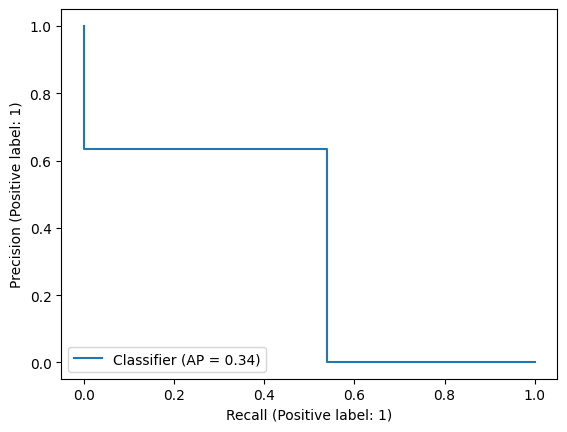

In [17]:
PrecisionRecallDisplay.from_predictions(y_test, y_log)
plt.show()

In [20]:
print("Random Forest" + ":\n\n")
print("  Inbananced\n")
print("    Test Accuracy inbalanced data = {} % \n".format(round(accuracy_score(y_test,y_RF)*100,2)))
print("    Test f1_score inbalanced data = {} % \n".format(round(f1_score(y_test,y_RF)*100,2)))
print("    Test precision inbalanced data = {} % \n".format(round(precision_score(y_test,y_RF)*100,2)))
print("    Test recall_score inbalanced data = {} % \n\n".format(round(recall_score(y_test,y_RF)*100,2)))
print("  OverSampling\n")
print("    Test Accuracy oversampled data = {} % \n".format(round(accuracy_score(y_test_os,y_RF_os)*100,2)))
print("    Test f1_score oversampled data = {} % \n".format(round(f1_score(y_test_os,y_RF_os)*100,2)))
print("    Test precision oversampled data = {} % \n".format(round(precision_score(y_test_os,y_RF_os)*100,2)))
print("    Test recall_score oversampled data = {} % \n\n".format(round(recall_score(y_test_os,y_RF_os)*100,2)))
print("  UnderSampling\n")
print("    Test Accuracy undersampled data = {} % \n".format(round(accuracy_score(y_test_us,y_RF_us)*100,2)))
print("    Test f1_score undersampled data = {} % \n".format(round(f1_score(y_test_us,y_RF_us)*100,2)))
print("    Test precision undersampled data = {} % \n".format(round(precision_score(y_test_us,y_RF_us)*100,2)))
print("    Test recall_score undersampled data = {} % \n\n".format(round(recall_score(y_test_us,y_RF_us)*100,2)))

Random Forest:


  Inbananced

    Test Accuracy inbalanced data = 99.96 % 

    Test f1_score inbalanced data = 84.08 % 

    Test precision inbalanced data = 94.29 % 

    Test recall_score inbalanced data = 75.86 % 


  OverSampling

    Test Accuracy oversampled data = 99.99 % 

    Test f1_score oversampled data = 99.99 % 

    Test precision oversampled data = 99.99 % 

    Test recall_score oversampled data = 100.0 % 


  UnderSampling

    Test Accuracy undersampled data = 95.26 % 

    Test f1_score undersampled data = 95.14 % 

    Test precision undersampled data = 97.78 % 

    Test recall_score undersampled data = 92.63 % 


